<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Simple_neural_networks_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

# Загрузка данных

In [2]:
!mkdir data
%cd data

/content/data


## Загрузка с kaggle (не нужно, но может пригодится)

Загрузим dataset CIFAR-10 c kaggle в папку data

In [3]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marinaromanova","key":"336a739f02ef0562320ae73de033490c"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33           7675        285  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset    Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19           7594        272  1.0              
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset                             25KB  2023-07-04 07:38:41           9177        165  1.0              
joebeachcapital/top-10000-spotify-songs-1960-now            Top 10000 Songs on S

In [6]:
%cd ./data
!kaggle competitions download -c cifar-10

[Errno 2] No such file or directory: './data'
/content/data
100% 712M/715M [00:07<00:00, 61.0MB/s]
100% 715M/715M [00:07<00:00, 96.9MB/s]


In [7]:
!mkdir cifar-10-kaggle
!unzip cifar-10.zip -d cifar-10-kaggle

Archive:  cifar-10.zip
  inflating: cifar-10-kaggle/sampleSubmission.csv  
  inflating: cifar-10-kaggle/test.7z  
  inflating: cifar-10-kaggle/train.7z  
  inflating: cifar-10-kaggle/trainLabels.csv  


In [8]:
!rm cifar-10.zip
!rm kaggle.json

## Загрузка с оф. сайта

In [9]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!mkdir cifar-10-official
!tar -xvf 'cifar-10-python.tar.gz' -C 'cifar-10-official'
!rm cifar-10-python.tar.gz

--2023-08-04 12:09:23--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  68.5MB/s    in 2.4s    

2023-08-04 12:09:25 (68.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


# Датасет

## Формирование датасета

In [10]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [11]:
def image_format(image_data):
    return (np.transpose(image_data.reshape(32, 32, 3, order='F'), axes=[1,0,2]))

In [12]:
cifar_data = unpickle('cifar-10-official/cifar-10-batches-py/data_batch_1') #берем только первый батч

In [13]:
data = cifar_data[b'data']
labels = np.array(cifar_data[b'labels'])

In [14]:
cifar_label_data = unpickle('cifar-10-official/cifar-10-batches-py/batches.meta')

In [15]:
label_names = cifar_label_data[b'label_names']
for i in range(len(label_names)):
    label_names[i] = label_names[i].decode('ASCII')

In [16]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

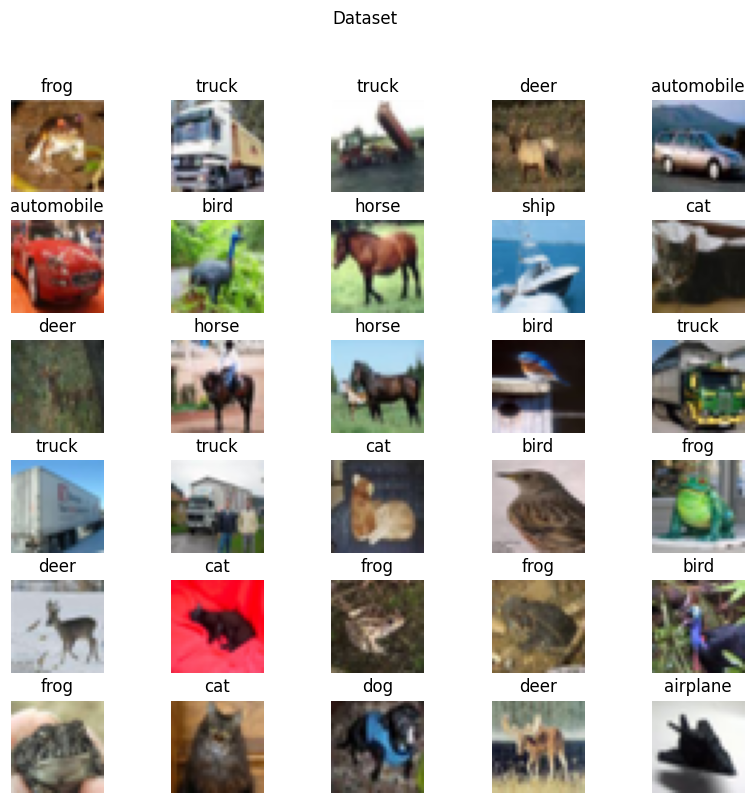

In [17]:
plt.figure(figsize=(10, 9))
for n in range(30):
    plt.subplot(6, 5, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image_format(data[n]))
    plt.title(label_names[labels[n]])
    plt.axis('off')
_ = plt.suptitle("Dataset")

In [18]:
cifar_test_data = unpickle('cifar-10-official/cifar-10-batches-py/test_batch') #берем тренировочный батч

test_data = cifar_data[b'data']
test_labels = np.array(cifar_data[b'labels'])

## Предобработка данных

In [19]:
data = data.reshape(data.shape[0], data.shape[1]).astype('float32') / 255
vect_labels = tf.keras.utils.to_categorical(labels, 10)

In [20]:
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1]).astype('float32') / 255
test_vect_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [21]:
val_data = data[-1000:]
val_vect_labels = vect_labels[-1000:]
val_labels = labels[-1000:]
data = data[:-1000]
vect_labels = vect_labels[:-1000]

## Представление датасета

In [22]:
def data_analysis(labels):
    unique, counts = np.unique(labels, return_counts=True)
    unique_names = ['' for i in range(len(unique))]
    for i in range(len(unique)):
        unique_names[i] = label_names[unique[i]]
    return dict(zip(unique_names, counts))

In [23]:
batch_analysis = pd.DataFrame(columns = label_names)
rows = []
rows.append(data_analysis(labels))
rows.append(data_analysis(val_labels))
rows.append(data_analysis(test_labels))
batches_analysis = pd.DataFrame()
batches_analysis['names'] = ['train', 'val', 'test']
batches_analysis = batches_analysis.join(pd.DataFrame.from_dict(rows, orient='columns'))
# batches_analysis['average'] = np.average(batches_analysis[label_names], axis=1)
batches_analysis['std'] = np.std(batches_analysis[label_names], axis=1)
batches_analysis

,names,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,std
0,train,1005,974,1032,1016,999,937,1030,1001,1025,981,27.996428
1,val,104,107,115,109,103,77,108,86,101,90,11.269428
2,test,1005,974,1032,1016,999,937,1030,1001,1025,981,27.996428


# Базовая нейросеть

Если я правильно поняла, то keras предлагает реализацию сверточных нейроных сетей (тип глубоких нейронных сетей). Сверточные нейронные сети состоят из линейной последовательности слоев. Первый слой (входной) должен иметь кол-во нейронов равное кол-ву переменных на вход (у нас это 3072). Последний слой (выходной) должен иметь кол-во нейронов, равное количеству классов. По какому принципу добавляются слои между я пока не поняла, поэтому их не будет.

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3072, activation='relu', input_shape=(3072,)),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.fit(data, vect_labels, validation_data=(val_data, val_vect_labels), epochs=5, batch_size=1000)

Epoch 1/5
9/9 [==============================] - 11s 987ms/step - loss: 11.4884 - accuracy: 0.1208 - val_loss: 7.0403 - val_accuracy: 0.1130
Epoch 2/5
9/9 [==============================] - 9s 1s/step - loss: 4.6417 - accuracy: 0.1322 - val_loss: 3.0788 - val_accuracy: 0.1770
Epoch 3/5
9/9 [==============================] - 8s 863ms/step - loss: 2.4595 - accuracy: 0.1767 - val_loss: 2.2010 - val_accuracy: 0.2080
Epoch 4/5
9/9 [==============================] - 9s 929ms/step - loss: 2.1439 - accuracy: 0.2246 - val_loss: 2.1109 - val_accuracy: 0.2130
Epoch 5/5
9/9 [==============================] - 9s 996ms/step - loss: 2.0518 - accuracy: 0.2638 - val_loss: 2.0144 - val_accuracy: 0.2920


# Оценка результатов для базовой нейросети

In [27]:
# результаты на тестовой выборке

loss, accuracy = model.evaluate(test_data, test_vect_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 19s 59ms/step - loss: 2.0135 - accuracy: 0.2957
Test Loss: 2.013521432876587
Test Accuracy: 0.2957000136375427


In [28]:
# результаты на тренировочной выборке

loss, accuracy = model.evaluate(data, vect_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

282/282 [==============================] - 11s 38ms/step - loss: 2.0134 - accuracy: 0.2961
Test Loss: 2.0134284496307373
Test Accuracy: 0.2961111068725586


## Визуализация

In [29]:
predicted_vect_labels = model.predict(test_data)

313/313 [==============================] - 12s 39ms/step


**Замеч.:** Вот тут я не уверена. Получается я решила задачу распознования как задачу классификации по кол-ву label-ов, а потом просто выбрала наиболее подходящий (то есть с наибольшим показателем принадлежности к классу).

In [30]:
predicted_labels = predicted_vect_labels.argmax(axis=1)

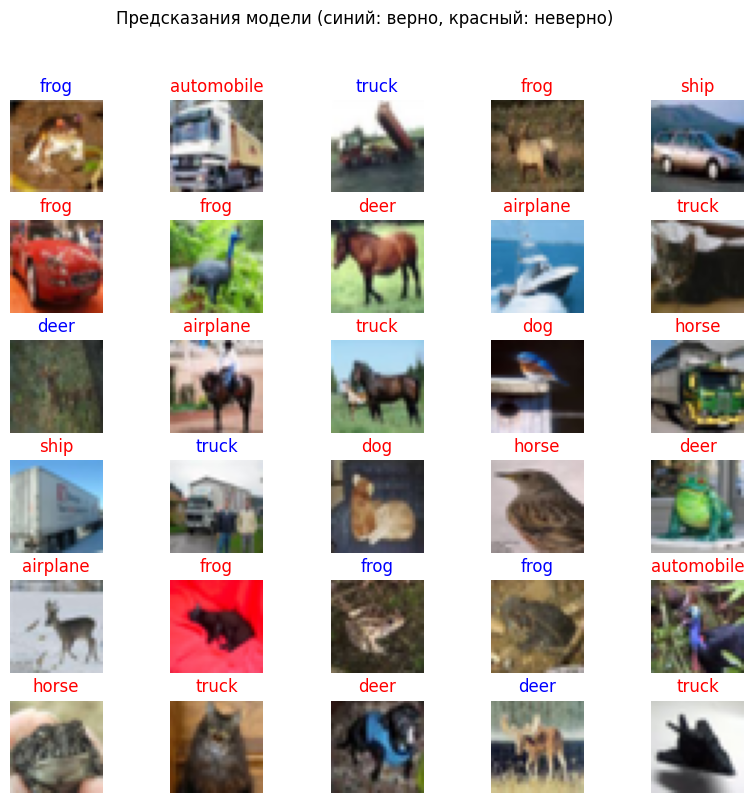

In [31]:
plt.figure(figsize=(10, 9))
for n in range(30):
    plt.subplot(6, 5, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image_format(test_data[n]))
    color = "blue" if predicted_labels[n] == test_labels[n] else "red"
    plt.title(label_names[predicted_labels[n]], color=color)
    plt.axis('off')
_ = plt.suptitle("Предсказания модели (синий: верно, красный: неверно)")

Результаты низкие, потому что стоит добавить что-то кроме входного и выходного слоя.

# Другая модель

In [32]:
def model_results(model, data, vect_labels):
    loss, accuracy = model.evaluate(data, vect_labels)
    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)

In [33]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(3072, activation='relu', input_shape=(3072,)),
    tf.keras.layers.Dense(6000, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.fit(data, vect_labels, validation_data=(val_data, val_vect_labels), epochs=5, batch_size=1000)

Epoch 1/5
9/9 [==============================] - 34s 4s/step - loss: 8.0269 - accuracy: 0.1172 - val_loss: 2.2952 - val_accuracy: 0.1120
Epoch 2/5
9/9 [==============================] - 31s 3s/step - loss: 2.2268 - accuracy: 0.1773 - val_loss: 2.1144 - val_accuracy: 0.2040
Epoch 3/5
9/9 [==============================] - 33s 4s/step - loss: 2.0541 - accuracy: 0.2462 - val_loss: 2.0003 - val_accuracy: 0.2520
Epoch 4/5
9/9 [==============================] - 33s 4s/step - loss: 1.9424 - accuracy: 0.2982 - val_loss: 1.9105 - val_accuracy: 0.2900
Epoch 5/5
9/9 [==============================] - 32s 4s/step - loss: 1.8610 - accuracy: 0.3329 - val_loss: 1.8641 - val_accuracy: 0.3150


In [34]:
model_results(model1, test_data, test_vect_labels)

313/313 [==============================] - 24s 75ms/step - loss: 1.8233 - accuracy: 0.3472
Test Loss: 1.8232672214508057
Test Accuracy: 0.3472000062465668


In [35]:
model_results(model1, data, vect_labels)

282/282 [==============================] - 21s 75ms/step - loss: 1.8187 - accuracy: 0.3508
Test Loss: 1.8187297582626343
Test Accuracy: 0.3507777750492096
